## Telecom Churn Case Study

### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

 

Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 
Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

### High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Business Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.


2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)


3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

### Data Understanding and Preparation

In [1]:
#importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the library to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
telecom = pd.read_csv("telecom_churn_data.csv", low_memory = False)

In [4]:
#displaying the first 5 rows of the dataset
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#checking the shape of our dataset
telecom.shape

(99999, 226)

We can see we have almost 226 columns and 99999 rows in our dataset

In [6]:
#checking the information of our dataset
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


We have 179 features which are of the float type, 35 of integer and 12 of the object type

In [7]:
#the unique identifier in our case is the feature mobile_number
#let us check the number of unique mobile numbers in our dataset
telecom.mobile_number.nunique()

99999

All the mobile numbers are unique in our dataset

In [8]:
(telecom.isnull().sum()/telecom.shape[0])*100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           1.018010
std_og_t2o_mou           1.018010
loc_ic_t2o_mou           1.018010
last_date_of_month_6     0.000000
last_date_of_month_7     0.601006
last_date_of_month_8     1.100011
last_date_of_month_9     1.659017
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
arpu_9                   0.000000
onnet_mou_6              3.937039
onnet_mou_7              3.859039
onnet_mou_8              5.378054
onnet_mou_9              7.745077
offnet_mou_6             3.937039
offnet_mou_7             3.859039
offnet_mou_8             5.378054
offnet_mou_9             7.745077
roam_ic_mou_6            3.937039
roam_ic_mou_7            3.859039
roam_ic_mou_8            5.378054
roam_ic_mou_9            7.745077
roam_og_mou_6            3.937039
roam_og_mou_7            3.859039
roam_og_mou_8            5.378054
roam_og_mou_9            7.745077
loc_og_t2t_mou

There are lot of missing values for the Data and Amt_Data columns indicating that no recharge was done on that month.
These NAN values should be replaced by 0.

In [9]:
telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

**High Value Customers**

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [10]:
#total recharge amounts for months 6 and 7
#total recharge amount = total data recharge + total recharge amount
telecom['total_avg_rech_amnt_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_avg_rech_amnt_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['avg_amnt_6'] = telecom['total_avg_rech_amnt_6'] + telecom['total_rech_amt_6']
telecom['avg_amnt_7'] = telecom['total_avg_rech_amnt_7'] + telecom['total_rech_amt_7']

In [11]:
#high value customers
telecom['Avg_rech_amnt']=(telecom['avg_amnt_6']+telecom['avg_amnt_7'])/2
percentile_cutoff = telecom['Avg_rech_amnt'].quantile(0.7)
percentile_cutoff

478.0

In [12]:
telecom=telecom[telecom['Avg_rech_amnt']>= percentile_cutoff]

In [13]:
telecom.drop(['total_avg_rech_amnt_6','total_avg_rech_amnt_7','avg_amnt_6','avg_amnt_7'],axis=1,inplace=True)

In [14]:
#we will also drop the below data columns as these are already used to calcuate the total recharge amount
#Hence these will make no more sense for our churn prediction
columns_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
telecom.drop(columns_to_drop, axis = 1, inplace = True)

In [15]:
telecom.shape

(30001, 221)

We will do the churn prediction only on the high value customers.

Churn and Not Churn is based on the fourth month in our dataset.
The conditions for churn are those who have not used mobile internet and have not made any calls even once.

In [16]:
telecom['Churn'] = 0
telecom.loc[((telecom['total_ic_mou_9']<=0) & (telecom['total_og_mou_9']<=0)) & ((telecom['vol_2g_mb_9']<=0) & (telecom['vol_3g_mb_9']<=0)),'Churn']=1

In [17]:
telecom.Churn.value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

Dropping the attributes corresponding to the churn phase

In [18]:
telecom = telecom.loc[:,~telecom.columns.str.endswith('_9')]
telecom = telecom.loc[:,~telecom.columns.str.startswith('sep')]

In [19]:
objcol=telecom.select_dtypes(include=['object'])
int64col=telecom.select_dtypes(include=['int64'])
float64col=telecom.select_dtypes(include=['float64'])
objcol.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [20]:
telecom['date_of_last_rech_data_8']=pd.to_datetime(telecom['date_of_last_rech_data_8']) 
telecom['last_date_of_month_6']=pd.to_datetime(telecom['last_date_of_month_6']) 
telecom['last_date_of_month_7']=pd.to_datetime(telecom['last_date_of_month_7']) 
telecom['last_date_of_month_8']=pd.to_datetime(telecom['last_date_of_month_8']) 
telecom['date_of_last_rech_6']=pd.to_datetime(telecom['date_of_last_rech_6']) 
telecom['date_of_last_rech_7']=pd.to_datetime(telecom['date_of_last_rech_7']) 
telecom['date_of_last_rech_8']=pd.to_datetime(telecom['date_of_last_rech_8']) 
telecom['date_of_last_rech_data_6']=pd.to_datetime(telecom['date_of_last_rech_data_6']) 
telecom['date_of_last_rech_data_7']=pd.to_datetime(telecom['date_of_last_rech_data_7'])

In [21]:
#checking the shape of our dataset
telecom.shape

(30001, 167)

Calculating the Churn Rate and Imbalance in our dataset

In [22]:
churn_rate = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn_rate

8.136395453484884

In [23]:
imbalance = (sum(telecom['Churn'] != 0) / sum(telecom['Churn'] == 0))*100
imbalance

8.857039187227866

we have Churn rate of 8.14% and Imbalance ratio of 8.85%

### Exploratory Data Analysis

In [24]:
pd.set_option('display.max_rows', telecom.shape[0]+1)

In [25]:
#lets do a describe on our dataset
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_rech_amnt,Churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,...,30001.000000,16756.000000,17057.000000,15953.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,109.0,0.0,0.0,0.0,558.490824,560.782203,508.597957,265.618262,272.700470,...,0.202393,0.926534,0.921733,0.897198,1209.368754,169.138860,178.872765,158.523962,1152.620628,0.081364
std,6.908784e+05,0.0,0.0,0.0,0.0,460.640461,479.776947,501.961981,462.493645,482.972367,...,1.100107,0.260908,0.268599,0.303710,957.677989,420.974354,443.544138,416.734860,1358.713982,0.273398
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,478.000000,0.000000
25%,7.000609e+09,109.0,0.0,0.0,0.0,309.865000,309.826000,231.473000,19.240000,18.155000,...,0.000000,1.000000,1.000000,1.000000,460.000000,0.000000,0.000000,0.000000,603.000000,0.000000
50%,7.001203e+09,109.0,0.0,0.0,0.0,481.694000,480.943000,427.585000,88.060000,86.885000,...,0.000000,1.000000,1.000000,1.000000,846.000000,0.000000,0.000000,0.000000,800.000000,0.000000
75%,7.001804e+09,109.0,0.0,0.0,0.0,699.943000,698.315000,661.491000,297.415000,298.087500,...,0.000000,1.000000,1.000000,1.000000,1756.000000,128.800000,137.290000,98.440000,1208.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,61236.000000,1.000000


we can see that few columns have unique values in all the rows. Hence this can be dropped from the dataset as it does not explain any variance and it would make sense to drop them for our further analysis.

In [26]:
#writing a function to get the columns which have only one unique value
def uniqueValFilter(df, n):
    clmn = df.nunique()
    return clmn[clmn <= n].index

In [27]:
#columns with only one value across all rows
uClmn = uniqueValFilter(telecom, 1)

In [28]:
telecom[uClmn].nunique()

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

The above columns can be dropped as this will not explain any variance in our dataset

In [29]:
telecom.drop(uClmn, axis = 1, inplace = True)

In [30]:
#seeing the shape of our dataset
telecom.shape

(30001, 154)

In [31]:
#checking how many rows have all missing values
telecom.isnull().all(axis=1).sum()

0

In [32]:
#dropping the rows having almost 60% of missing data
telecom = telecom[(telecom.isnull().sum(axis=1)/telecom.shape[1])*100 < 60]
print("Record Count After Row/Column Data Deletion", telecom.shape[0])

Record Count After Row/Column Data Deletion 29966


Lets Create Bar Plots to Understand the Data Even Further. For the same purpose lets use the below features:
1. ARPU - Average Revenue Per User
2. IC - Incoming Calls Usage
3. OG - Outgoing Calls Usage
4. ONNET - Calls within the same network
5. OFFNET - Calls Outside of the operator network


In [33]:
arpu = telecom.loc[:,telecom.columns.str.contains('arpu')]
arpu.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [34]:
ic = telecom.loc[:,telecom.columns.str.contains('ic')]
ic.columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'],
      dtype='object')

In [35]:
og = telecom.loc[:,telecom.columns.str.contains('og')]
og.columns

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

In [36]:
onnet = telecom.loc[:,telecom.columns.str.contains('onnet')]
onnet.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

In [37]:
offnet = telecom.loc[:,telecom.columns.str.contains('offnet')]
offnet.columns

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [38]:
#these are the columns that we will consider for the creating bar plots
arpu = ['arpu_6', 'arpu_7', 'arpu_8']
ic = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
og = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
onnet = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
offnet = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

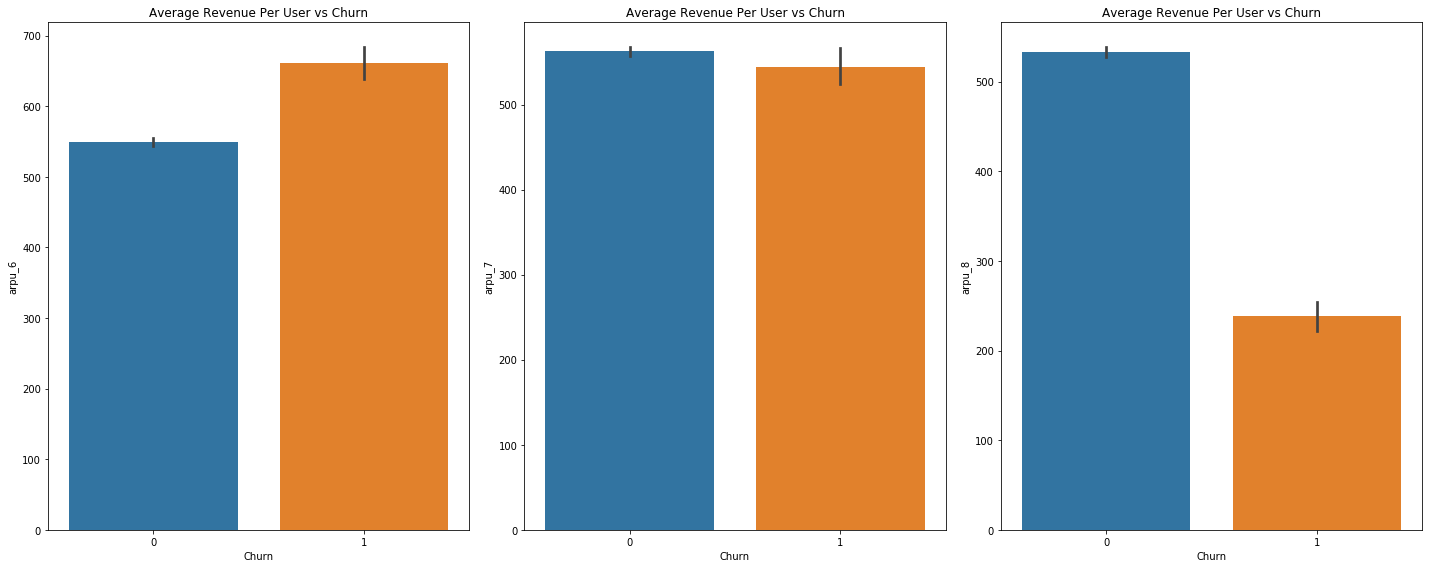

In [39]:
#arpu
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x = 'Churn', y = 'arpu_6', data = telecom)
plt.title("Average Revenue Per User vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'Churn', y = 'arpu_7', data = telecom)
plt.title("Average Revenue Per User vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'Churn', y = 'arpu_8', data = telecom)
plt.title("Average Revenue Per User vs Churn")
plt.tight_layout()
plt.show()

From the above the average revenue drop in the 8th month indicates the possibility of churn

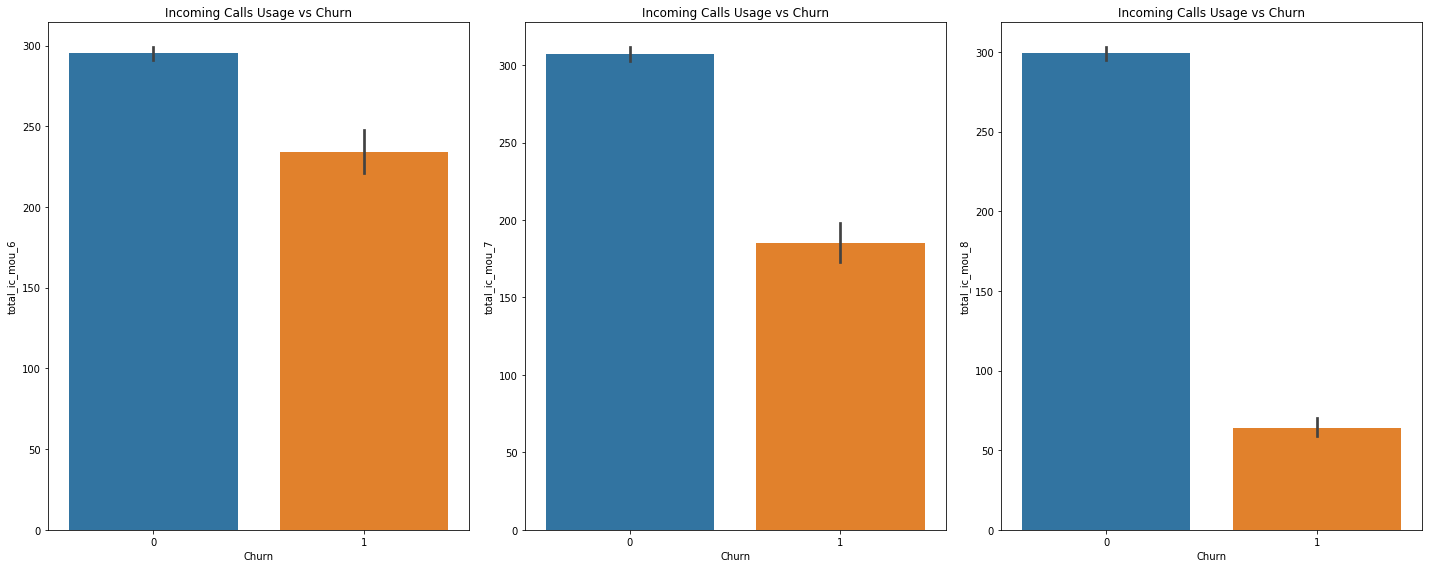

In [40]:
#ic
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x = 'Churn', y = 'total_ic_mou_6', data = telecom)
plt.title("Incoming Calls Usage vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'Churn', y = 'total_ic_mou_7', data = telecom)
plt.title("Incoming Calls Usage vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'Churn', y = 'total_ic_mou_8', data = telecom)
plt.title("Incoming Calls Usage vs Churn")
plt.tight_layout()
plt.show()

The incoming calls usage also drop in the 8th month which again indicates the churn

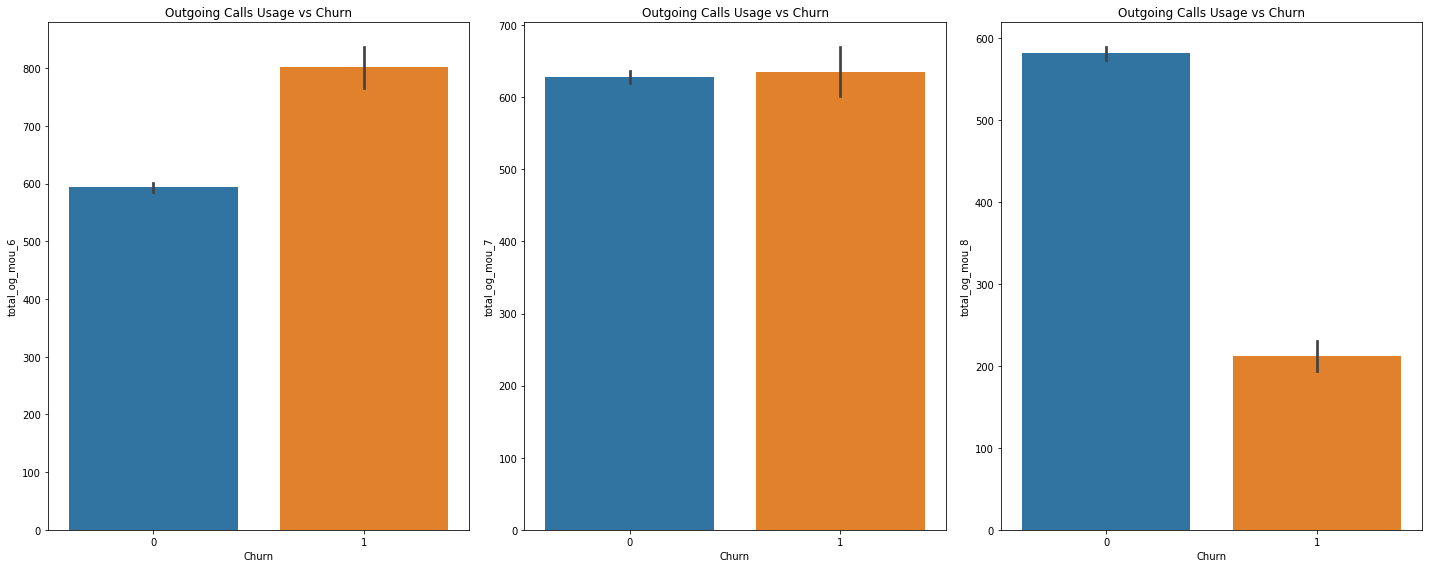

In [41]:
#og
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x = 'Churn', y = 'total_og_mou_6', data = telecom)
plt.title("Outgoing Calls Usage vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'Churn', y = 'total_og_mou_7', data = telecom)
plt.title("Outgoing Calls Usage vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'Churn', y = 'total_og_mou_8', data = telecom)
plt.title("Outgoing Calls Usage vs Churn")
plt.tight_layout()
plt.show()

Outgoing calls usage also drop in the 8th month indicating churn

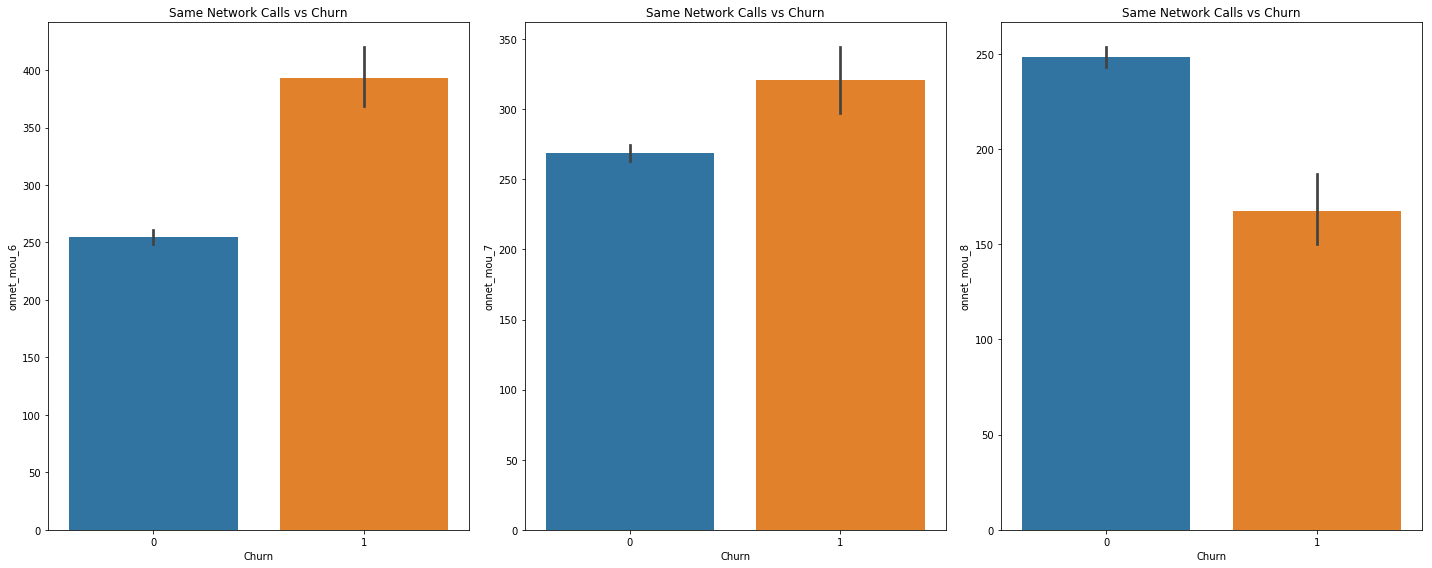

In [42]:
#onnet
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x = 'Churn', y = 'onnet_mou_6', data = telecom)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'Churn', y = 'onnet_mou_7', data = telecom)
plt.title("Same Network Calls vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'Churn', y = 'onnet_mou_8', data = telecom)
plt.title("Same Network Calls vs Churn")
plt.tight_layout()
plt.show()

Calls within the same network also indicates a drop in the 8th month leading to churn

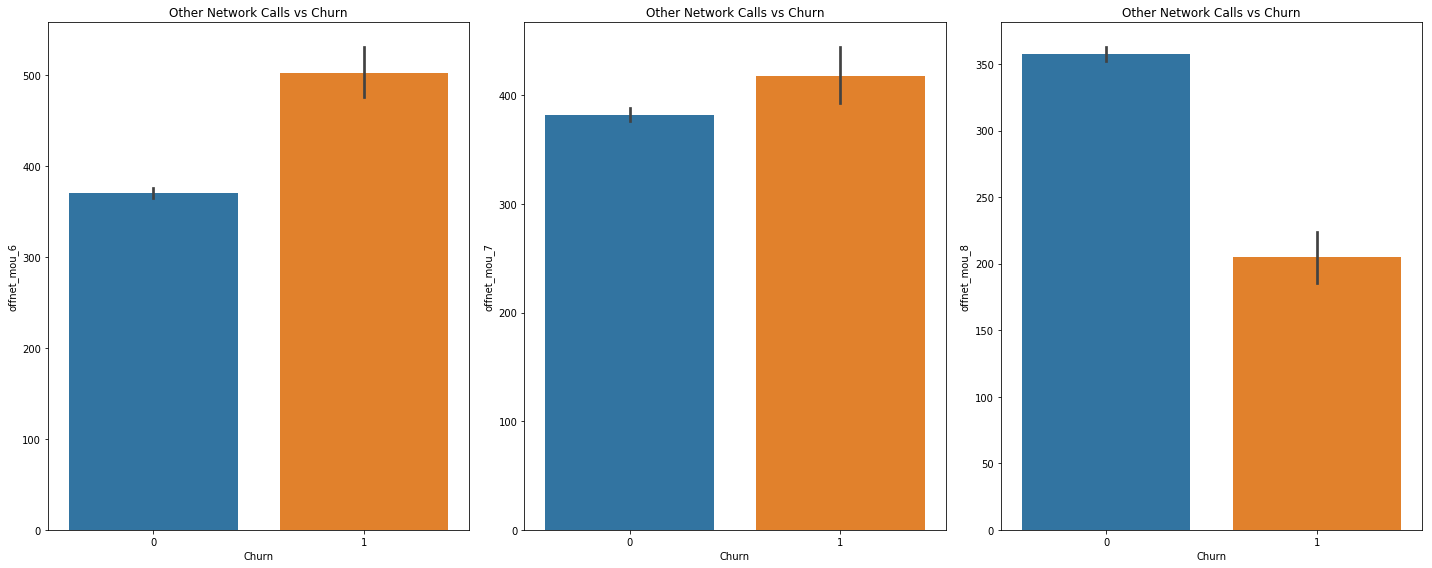

In [43]:
#offnet
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot(x = 'Churn', y = 'offnet_mou_6', data = telecom)
plt.title("Other Network Calls vs Churn")
plt.subplot(1,3,2)
sns.barplot(x = 'Churn', y = 'offnet_mou_7', data = telecom)
plt.title("Other Network Calls vs Churn")
plt.subplot(1,3,3)
sns.barplot(x = 'Churn', y = 'offnet_mou_8', data = telecom)
plt.title("Other Network Calls vs Churn")
plt.tight_layout()
plt.show()

Calls to different network also indicates a drop in the 8th month indicating churn

In [44]:
#lets create correlation plots for some of the categories
rech_data = telecom.loc[:,telecom.columns.str.contains('rech')]
total_data = telecom.loc[:,telecom.columns.str.contains('tot')]
ic_mou = telecom.loc[:,(telecom.columns.str.contains('ic') & telecom.columns.str.contains('mou'))]
og_mou = telecom.loc[:,(telecom.columns.str.contains('og') & telecom.columns.str.contains('mou'))]
data2g = telecom.loc[:,telecom.columns.str.contains('2g')]
data3g = telecom.loc[:,telecom.columns.str.contains('3g')]

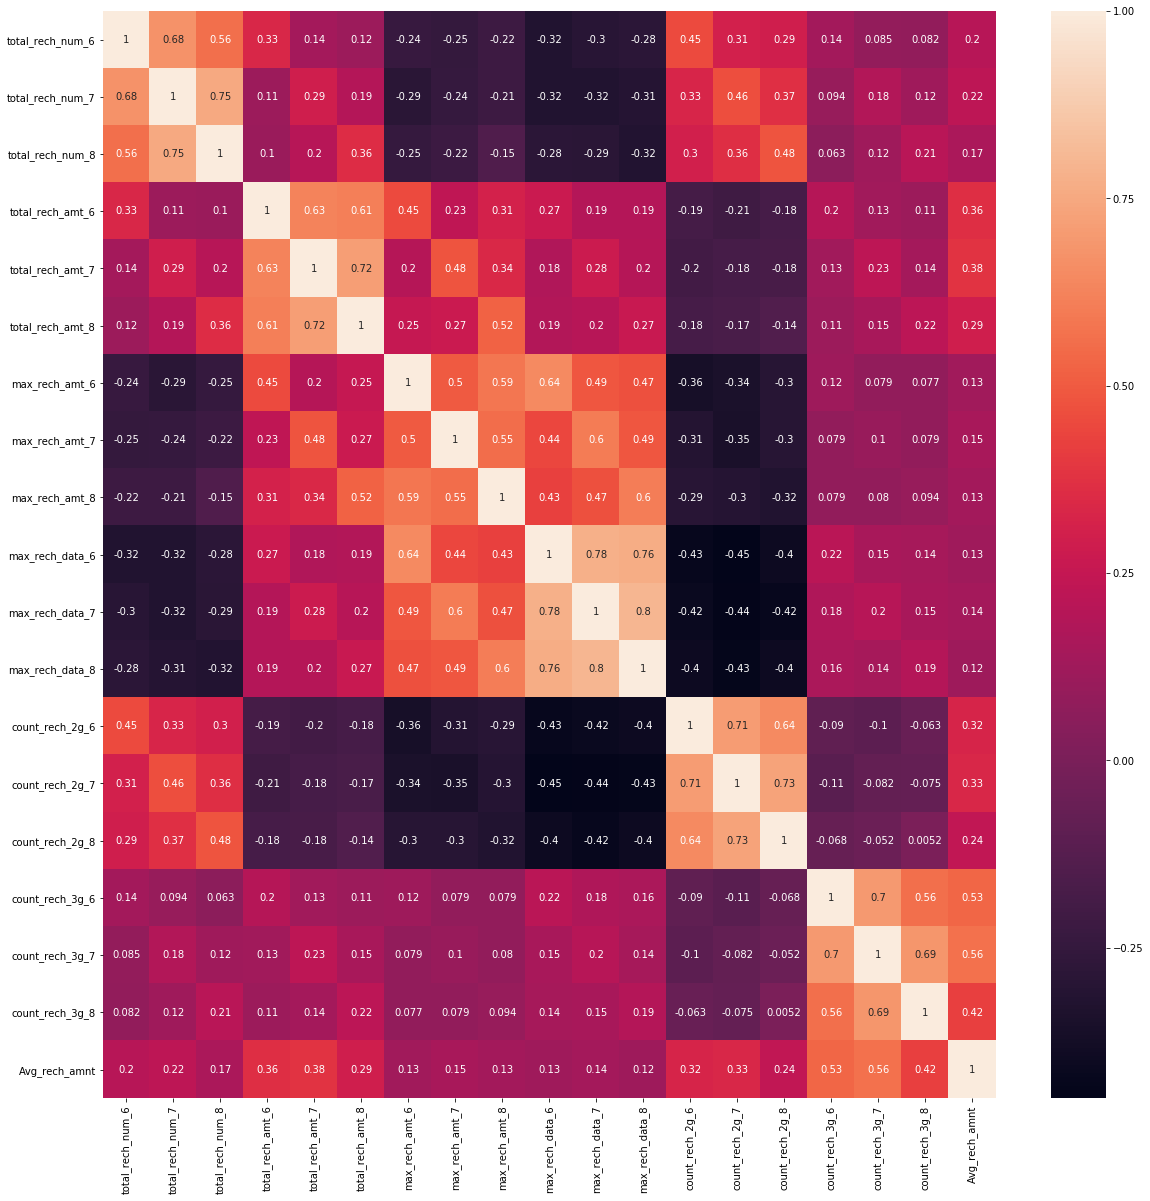

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(rech_data.corr(), annot = True)
plt.show()

Following are the observations from the above plot:
1. The total recharge number for 8th month has a high correlation with total recharge number for 7th month
2. toatl recharge amount for 8th month has a high correlation with total recharge amount for the 7th month.
3. The max data recharge for 7th month has almost 80% correlation with the 8th month.
4. Any factor having a correlation with 8th month is correlated to the churn prediction as well.

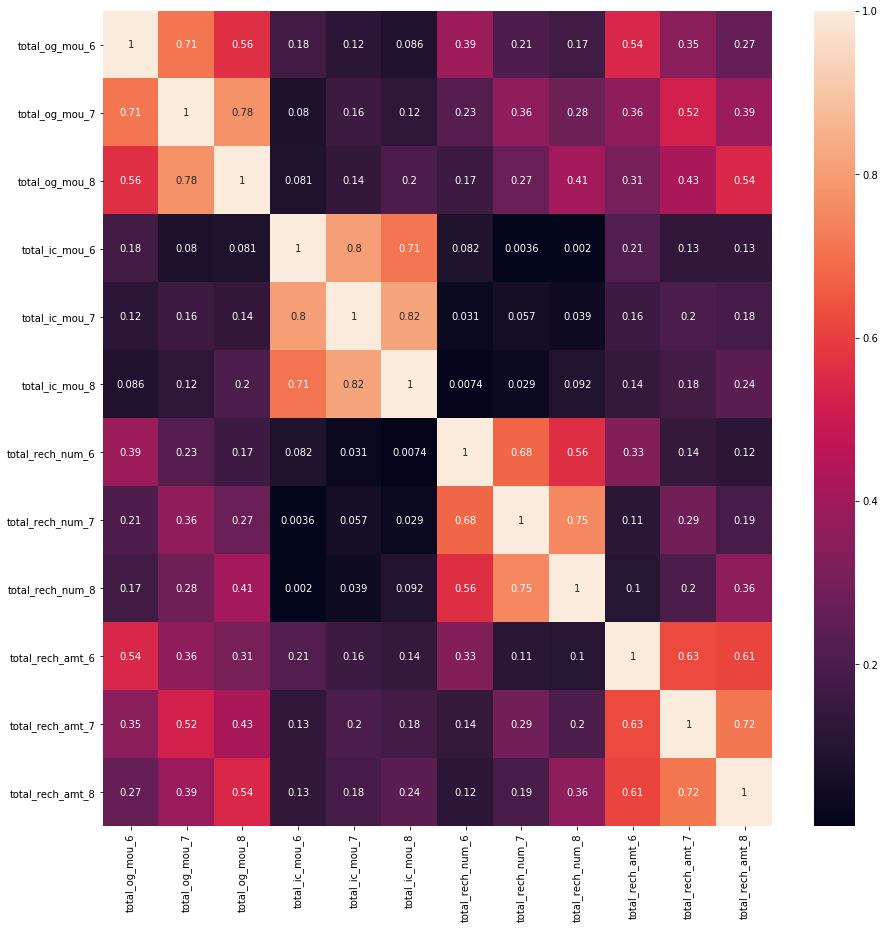

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot = True)
plt.show()

Following are the observations from the above plot:
1. Total Outgoing Calls Usage has a high correlation between 7th and the 8th month

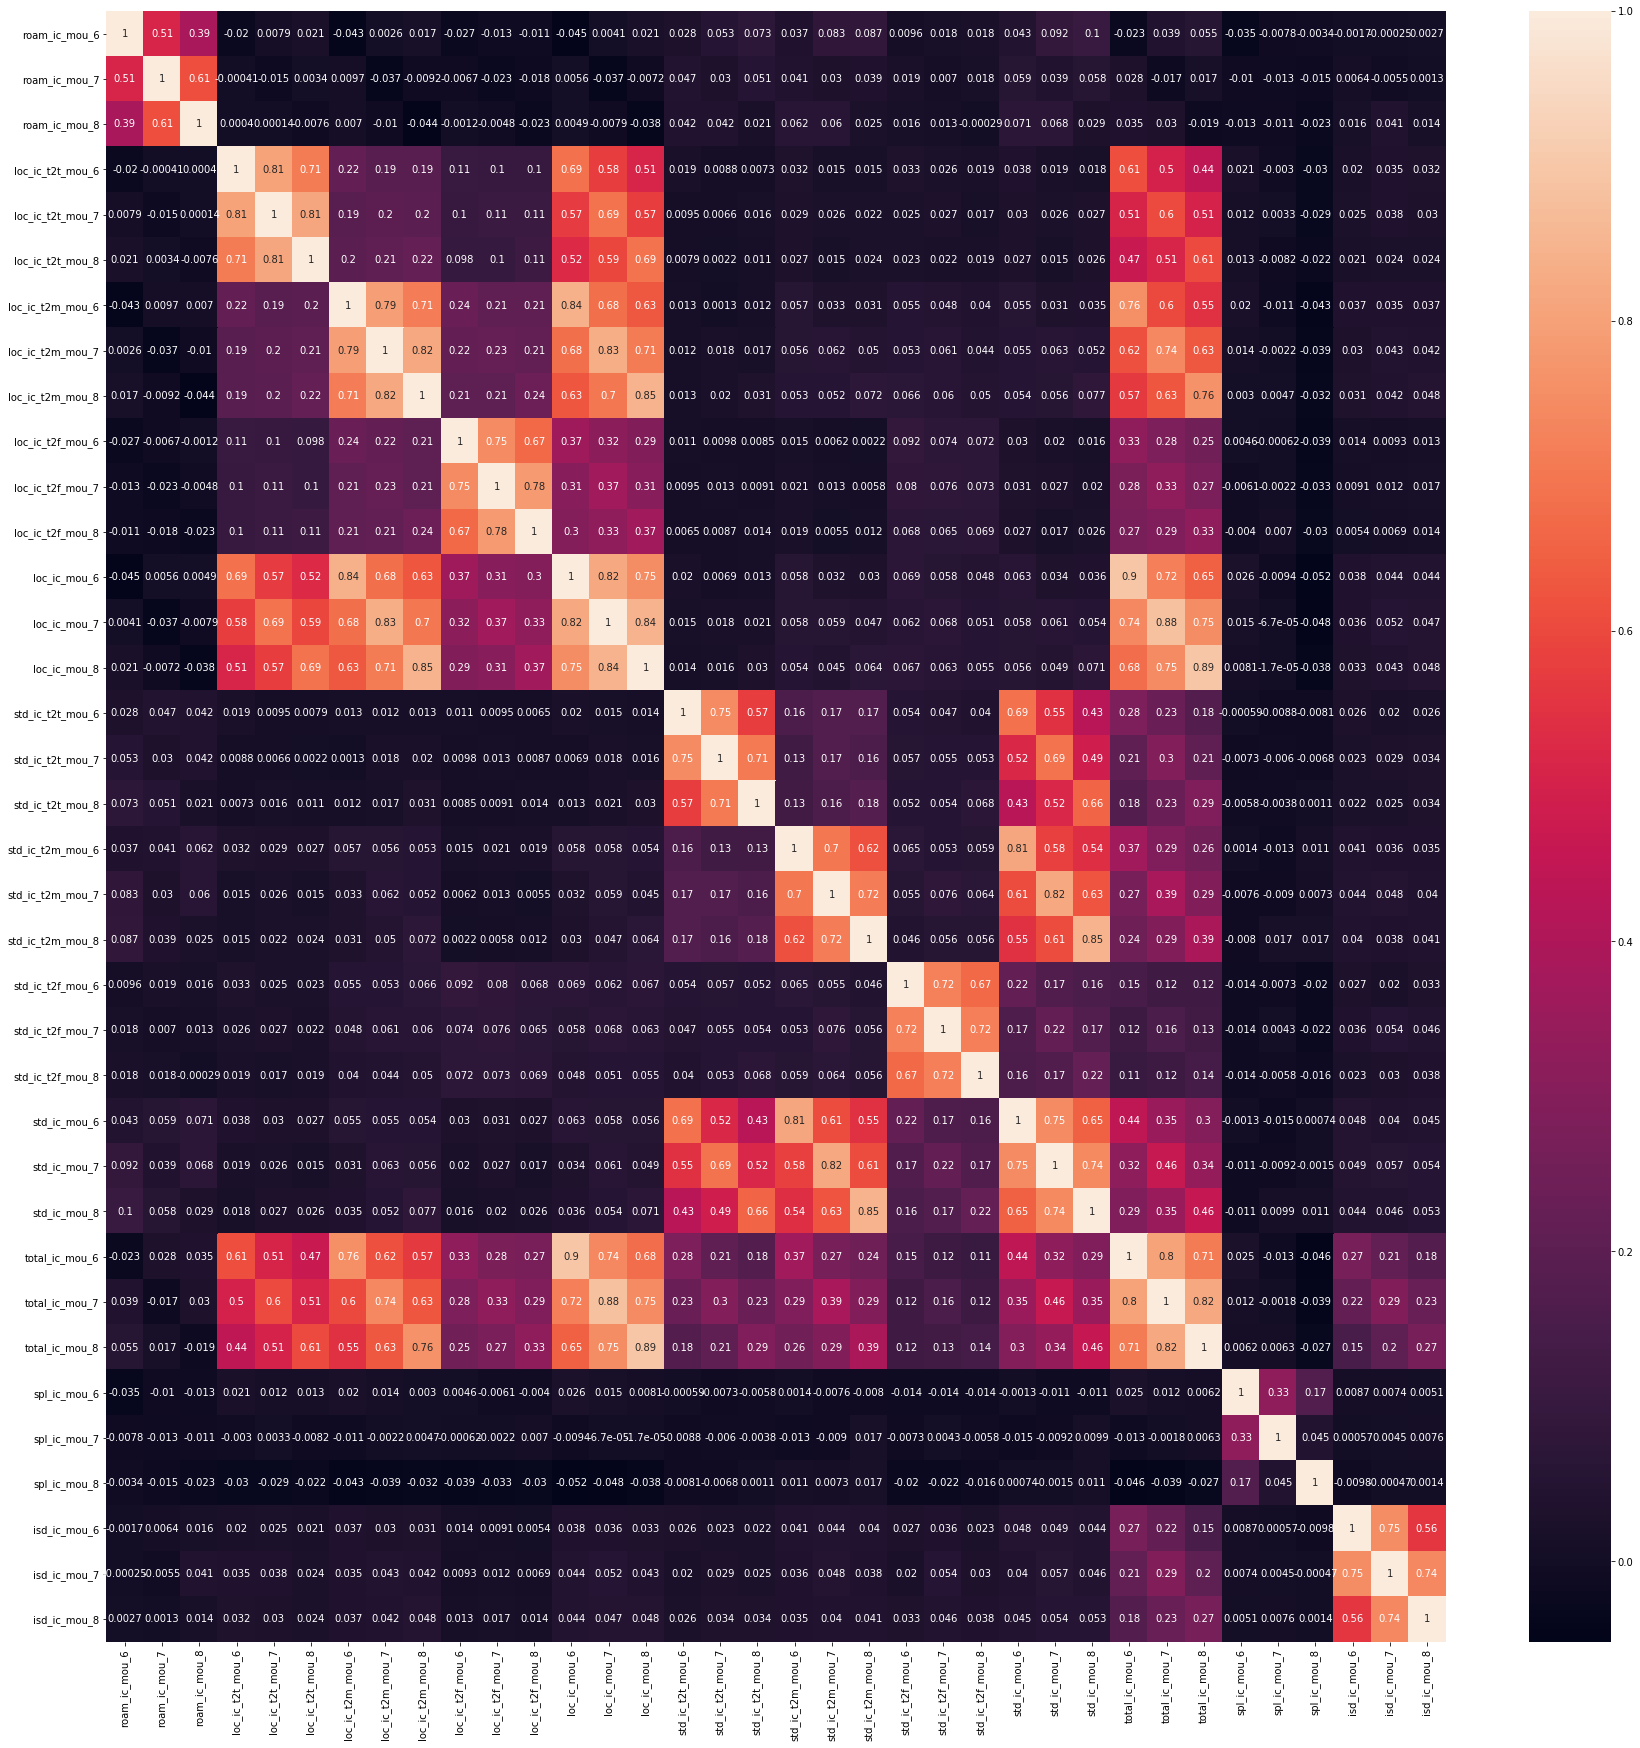

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(ic_mou.corr(), annot = True)
plt.show()

Following are the observations from the above plot:
1. The total incoming calls usage is entirely explained by local incoming call usage and not by STD calls.

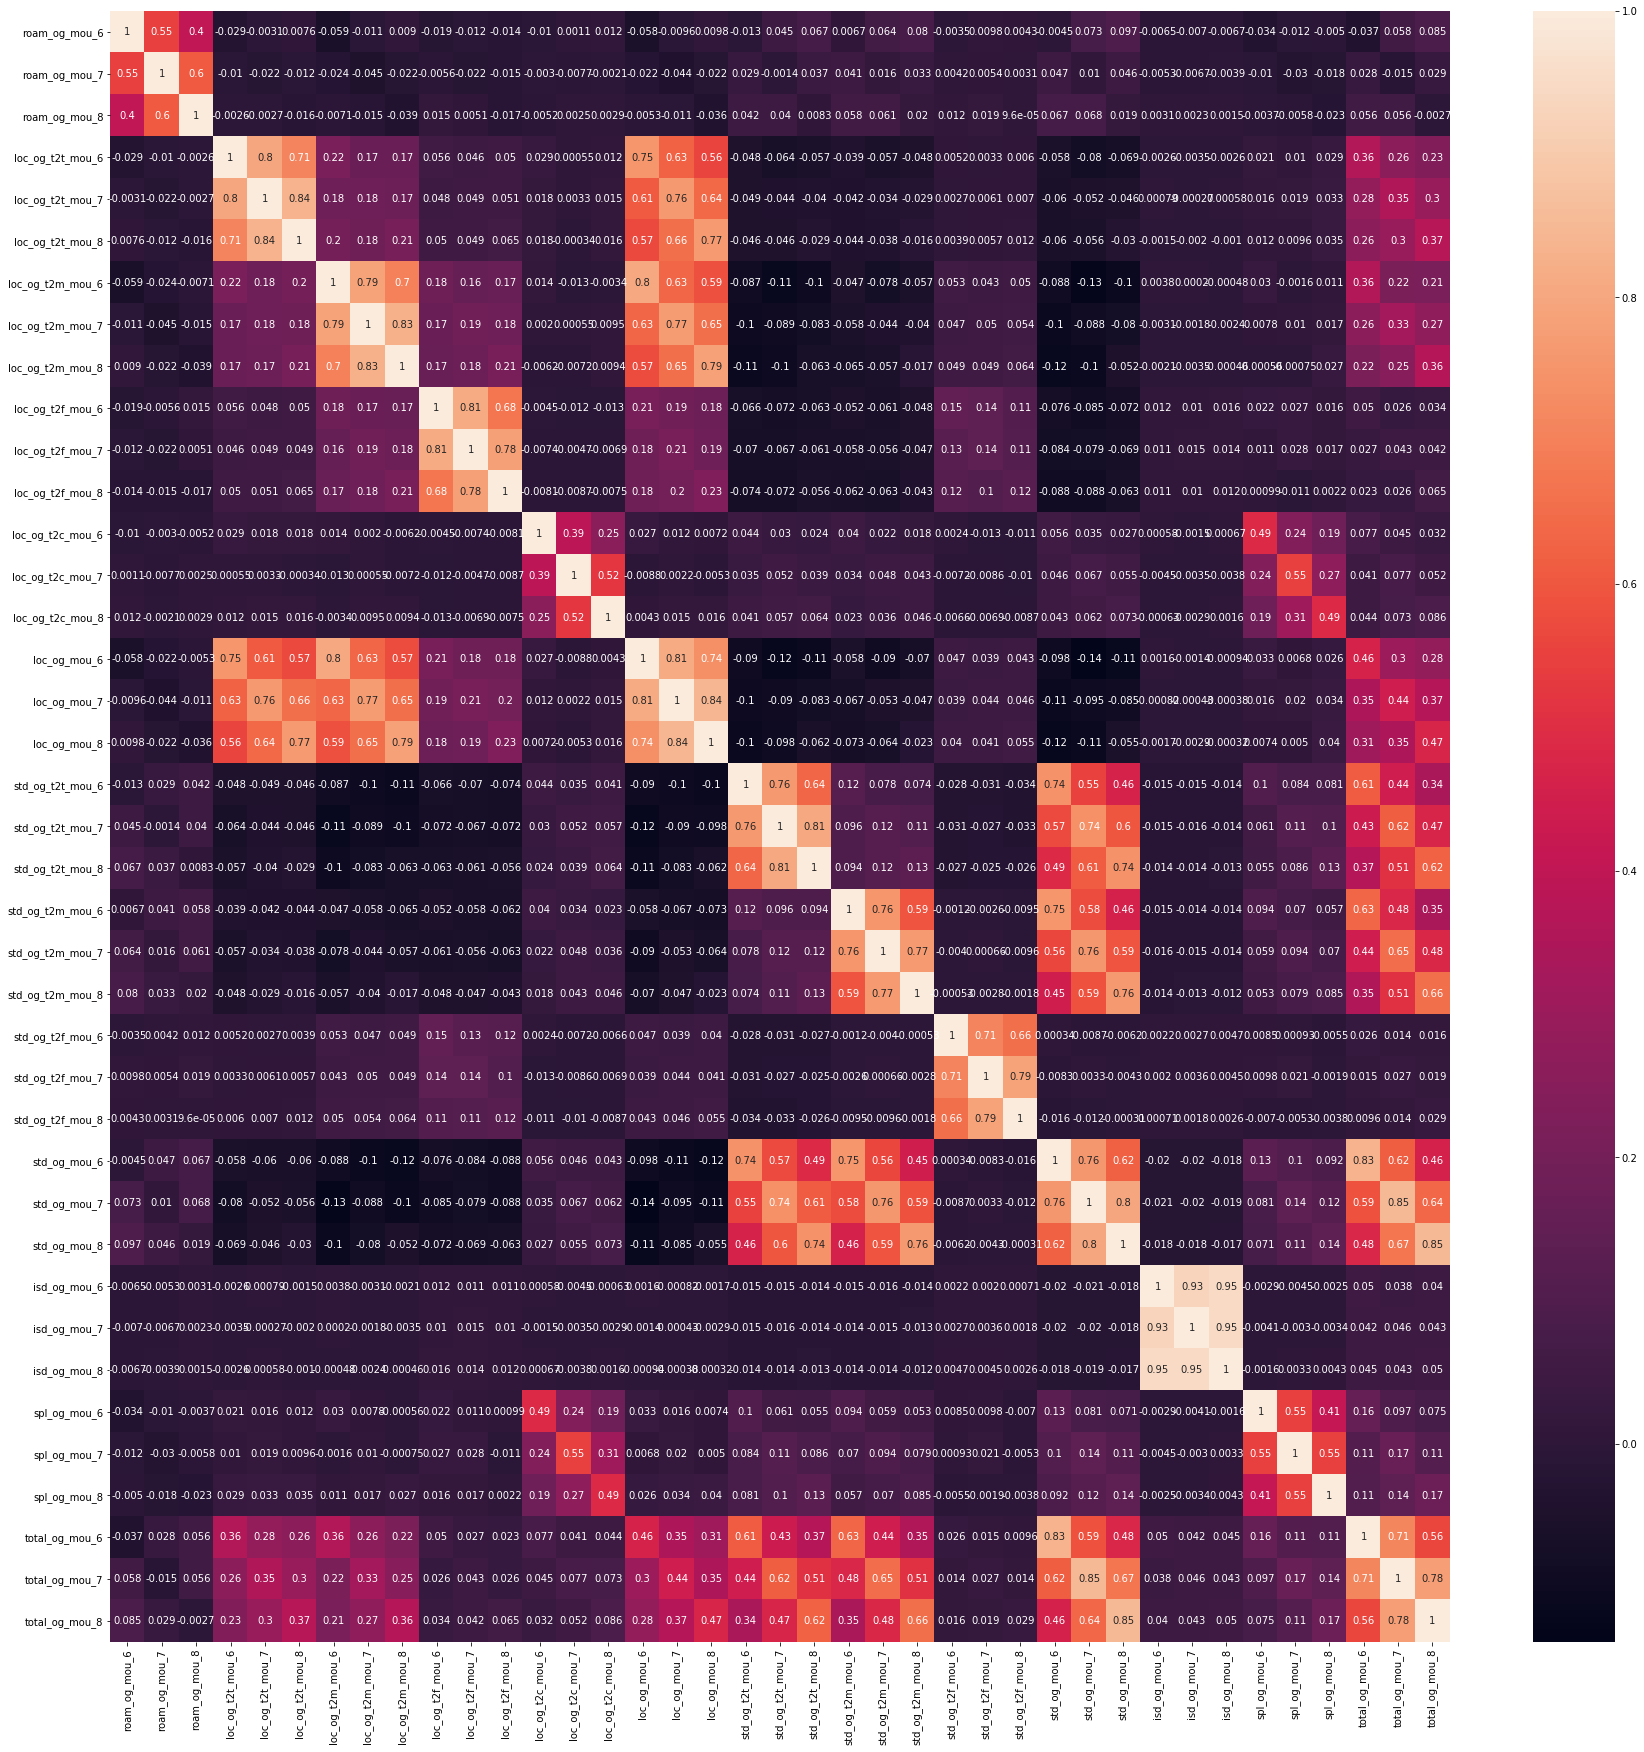

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(og_mou.corr(), annot = True)
plt.show()

The total outgoing calls usage is entirely explained by STD calls usage and not by local call usage.

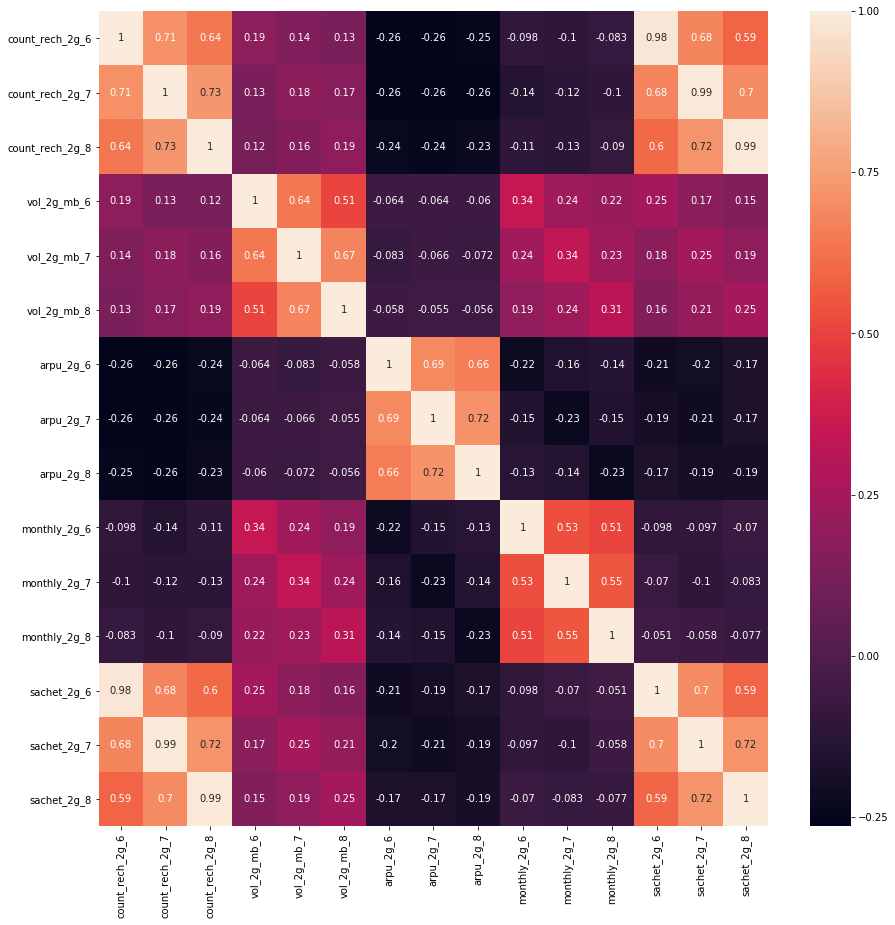

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data2g.corr(), annot = True)
plt.show()

The average revenue per user for 2g is highly correlated between 7th and the 8th month. Which also means that they can have a similar usage between 7th and the 8th month.

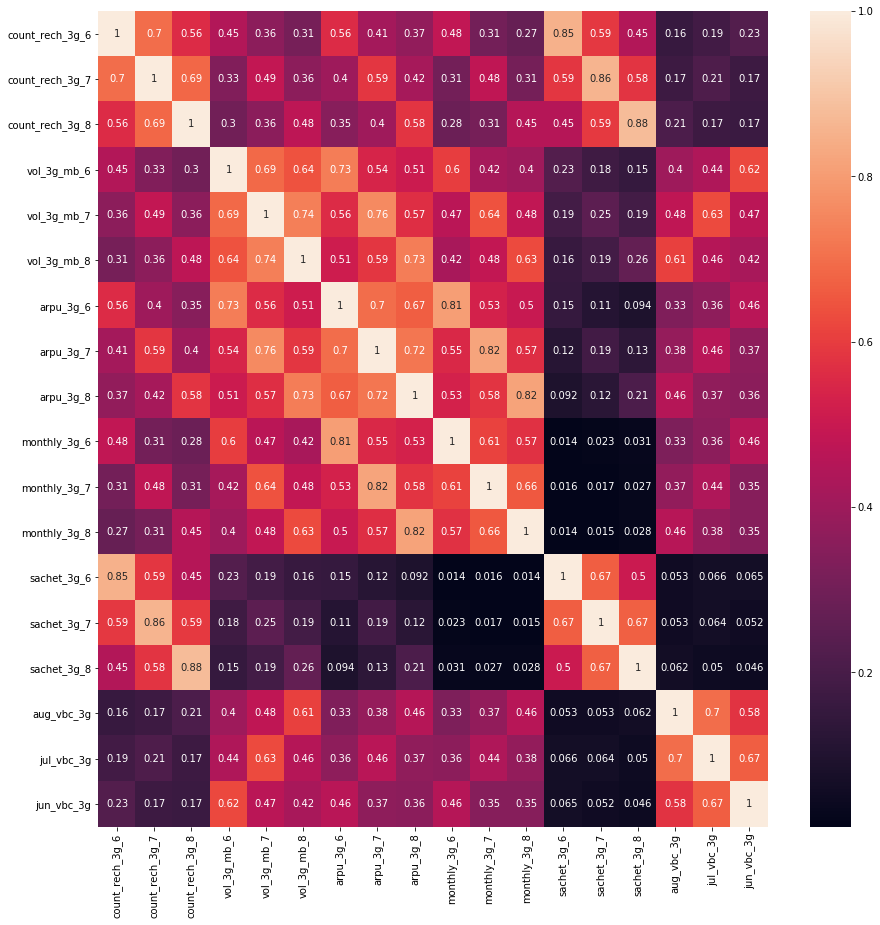

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(data3g.corr(), annot = True)
plt.show()

1. The average revenue for 3g is heavily correlated with the volume of 3g data used.
2. The volume of 3g MB used is correlated between 7th and the 8th month by almost 74%

In [51]:
#impute NaN values based on Column type, if it is a Object then impute with Mode else 0
for i in telecom.columns:
    if telecom[i].dtypes == 'object':
        telecom[i] = telecom[i].fillna(telecom[i].mode().iloc[0])
    else:
        telecom[i] = telecom[i].fillna(0)

In [52]:
telecom['Churn'].astype(int)

0        1
7        1
8        0
21       0
23       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
61       0
67       1
69       0
73       0
77       0
86       1
87       0
91       0
92       0
96       0
101      0
102      0
103      0
104      0
105      0
111      1
115      0
124      0
131      0
133      0
134      0
146      0
147      0
149      0
154      0
157      0
158      0
170      0
171      0
172      0
173      0
176      0
177      0
184      0
185      0
188      1
191      0
193      0
195      0
199      1
204      0
206      0
208      0
212      0
213      0
218      0
224      0
225      0
226      0
235      0
241      0
242      0
244      0
246      0
252      0
253      0
255      0
256      0
265      0
266      0
270      0
274      0
278      0
281      0
283      0
284      0
290      0
293      0
294      0
295      0
301      0
304      0
310      0
319      0
320      1
321      0
322      0
329      0
333      0

In [53]:
#checking now for null values
(telecom.isnull().sum()/telecom.shape[0])*100

mobile_number               0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t2f_mou_8            0.0
loc_og_t2c_mou_6            0.0
loc_og_t2c_mou_7            0.0
loc_og_t2c_mou_8            0.0
loc_og_mou_6                0.0
loc_og_mou_7                0.0
loc_og_mou_8                0.0
std_og_t

We have no null values now present in the dataset

**Derived Features**

Following are some of the derived features that can be created:
1. Difference between Average ARPU during "Good" phase and "Action Phase"
2. Difference between Outgoing Calls during "Good" phase and "Action Phase"
3. Difference between Incoming Calls during "Good" phase and "Action Phase"
4. Difference between ONNET calls during "Good" phase and "Action Phase"
5. Difference between OFFNET calls during "Good" phase and "Action Phase"
6. Difference between Average 2g usage during "Good" phase and "Action Phase"
7. Difference between Average 3g usage during "Good" phase and "Action Phase"

In [54]:
telecom['arpu_variance']=((telecom['arpu_6']+telecom['arpu_7'])/2)-telecom['arpu_8']

In [55]:
telecom['loc_og_mou_variance']=((telecom['loc_og_mou_6']+telecom['loc_og_mou_7'])/2)-telecom['loc_og_mou_8']

In [56]:
telecom['loc_ic_mou_variance']=((telecom['loc_ic_mou_6']+telecom['loc_ic_mou_7'])/2)-telecom['loc_ic_mou_8']

In [57]:
telecom['onnet_mou_variance']=((telecom['onnet_mou_6']+telecom['onnet_mou_7'])/2)-telecom['onnet_mou_8']

In [58]:
telecom['offnet_mou_variance']=((telecom['offnet_mou_6']+telecom['offnet_mou_7'])/2)-telecom['offnet_mou_8']

In [59]:
telecom['vol_2g_mb_variance']=((telecom['vol_2g_mb_6']+telecom['vol_2g_mb_7'])/2)-telecom['vol_2g_mb_8']

In [60]:
telecom['vol_3g_mb_variance']=((telecom['vol_3g_mb_6']+telecom['vol_3g_mb_7'])/2)-telecom['vol_3g_mb_8']

In [61]:
telecom['arpu_3g_variance']=((telecom['arpu_3g_6']+telecom['arpu_3g_7'])/2)-telecom['arpu_3g_8']

In [62]:
telecom['night_pck_user_variance']=((telecom['night_pck_user_6']+telecom['night_pck_user_7'])/2)-telecom['night_pck_user_8']

In [63]:
telecom['max_rech_data_variance']=((telecom['max_rech_data_6']+telecom['max_rech_data_7'])/2)-telecom['max_rech_data_8']

In [64]:
telecom['max_rech_amt_variance']=((telecom['max_rech_amt_6']+telecom['max_rech_amt_7'])/2)-telecom['max_rech_amt_8']

In [65]:
telecom['total_rech_amt_variance']=((telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2)-telecom['total_rech_amt_8']

In [66]:
telecom['total_og_mou_variance']=((telecom['total_og_mou_6']+telecom['total_og_mou_7'])/2)-telecom['total_og_mou_8']

In [67]:
telecom['total_ic_mou_variance']=((telecom['total_ic_mou_6']+telecom['total_ic_mou_7'])/2)-telecom['total_ic_mou_8']

In [68]:
telecom['roam_ic_mou_variance']=((telecom['roam_ic_mou_6']+telecom['roam_ic_mou_7'])/2)-telecom['roam_ic_mou_8']

In [69]:
telecom['roam_og_mou_variance']=((telecom['roam_og_mou_6']+telecom['roam_og_mou_7'])/2)-telecom['roam_og_mou_8']

In [70]:
telecom['monthly_2g_variance']=((telecom['monthly_2g_6']+telecom['monthly_2g_7'])/2)-telecom['monthly_2g_8']

In [71]:
telecom['monthly_3g_variance']=((telecom['monthly_3g_6']+telecom['monthly_3g_7'])/2)-telecom['monthly_3g_8']

In [72]:
telecom['fb_user_variance']=((telecom['fb_user_6']+telecom['fb_user_7'])/2)-telecom['fb_user_8']

In [73]:
telecom['loc_og_t2t_mou_variance']=((telecom['loc_og_t2t_mou_6']+telecom['loc_og_t2t_mou_7'])/2)-telecom['loc_og_t2t_mou_8']

In [74]:
telecom['loc_og_t2m_mou_variance']=((telecom['loc_og_t2m_mou_6']+telecom['loc_og_t2m_mou_7'])/2)-telecom['loc_og_t2m_mou_8']

In [75]:
telecom['loc_ic_mou_variance']=((telecom['loc_ic_mou_6']+telecom['loc_ic_mou_7'])/2)-telecom['loc_ic_mou_8']

In [76]:
telecom['fb_user_variance']=((telecom['fb_user_6']+telecom['fb_user_7'])/2)-telecom['fb_user_8']

In [77]:
telecom['loc_ic_t2m_mou_variance']=((telecom['loc_ic_t2m_mou_6']+telecom['loc_ic_t2m_mou_7'])/2)-telecom['loc_ic_t2m_mou_8']

In [78]:
telecom['std_og_mou_variance']=((telecom['std_og_mou_6']+telecom['std_og_mou_7'])/2)-telecom['std_og_mou_8']

In [79]:
telecom['loc_og_mou_variance']=((telecom['loc_og_mou_6']+telecom['loc_og_mou_7'])/2)-telecom['loc_og_mou_8']

In [80]:
telecom = telecom.loc[:,~telecom.columns.str.contains('date_')]
telecom.drop(['mobile_number'],axis=1,inplace=True)

In [81]:
telecom.shape

(29966, 170)

**Train Test Split**

In [82]:
y=telecom.loc[:,'Churn']
X=telecom.loc[:,telecom.columns!='Churn']

In [83]:
print(X.shape)
print(y.shape)

(29966, 169)
(29966,)


In [84]:
#performing the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [85]:
#Standardissing the Features
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [86]:
#displaying the first 5 rows of X_train
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_ic_mou_variance,roam_ic_mou_variance,roam_og_mou_variance,monthly_2g_variance,monthly_3g_variance,fb_user_variance,loc_og_t2t_mou_variance,loc_og_t2m_mou_variance,loc_ic_t2m_mou_variance,std_og_mou_variance
54929,282.401,262.411,368.867,3.39,7.14,9.44,111.66,132.73,160.26,0.00,...,-36.385,0.000,0.00,1.0,-1.0,0.0,-4.175,-39.130,-30.925,0.215
60654,339.421,411.112,323.222,259.18,150.98,191.23,364.01,274.13,206.58,0.00,...,53.470,-46.830,-81.26,0.0,0.0,0.0,12.625,68.445,39.340,127.930
25535,1010.328,794.929,859.527,1530.98,1496.28,1471.41,395.84,196.81,342.94,0.00,...,11.940,0.000,0.00,0.0,0.0,0.0,58.530,60.985,84.315,-124.370
83361,666.130,684.593,439.121,150.41,108.11,77.73,625.08,994.51,773.31,109.36,...,-130.595,54.680,227.88,0.0,0.0,-0.5,-35.545,-72.990,-95.890,-38.190
98897,884.162,607.375,475.736,14.53,15.38,2.99,1013.93,453.13,152.91,45.63,...,136.945,22.815,24.53,-1.0,0.0,0.0,10.720,196.080,90.470,360.475


In [87]:
#displaying the first 5 rows of X_train_scaled
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_ic_mou_variance,roam_ic_mou_variance,roam_og_mou_variance,monthly_2g_variance,monthly_3g_variance,fb_user_variance,loc_og_t2t_mou_variance,loc_og_t2m_mou_variance,loc_ic_t2m_mou_variance,std_og_mou_variance
0,-0.574058,-0.609353,-0.268486,-0.565837,-0.552464,-0.502757,-0.546210,-0.492058,-0.361115,-0.210817,...,-0.221766,-0.032363,-0.045170,2.750429,-2.119496,-0.121725,-0.084359,-0.339607,-0.264603,-0.103635
1,-0.454892,-0.304722,-0.355696,-0.003295,-0.248471,-0.097648,-0.015348,-0.207827,-0.266236,-0.210817,...,0.182156,-0.726352,-0.934983,-0.072539,-0.028313,-0.121725,0.041194,0.396470,0.266547,0.194146
2,0.947246,0.481572,0.668975,2.793690,2.594703,2.755162,0.051612,-0.363250,0.013076,-0.210817,...,-0.004532,-0.032363,-0.045170,-0.072539,-0.028313,-0.121725,0.384259,0.345426,0.606524,-0.394117
3,0.227902,0.255536,-0.134258,-0.242506,-0.339073,-0.350576,0.533859,1.240225,0.894620,1.196568,...,-0.645264,0.777957,2.450160,-0.072539,-0.028313,-1.502633,-0.318799,-0.571292,-0.755689,-0.193180
4,0.683570,0.097346,-0.064301,-0.541338,-0.535050,-0.517130,1.351874,0.151985,-0.376170,0.376408,...,0.557398,0.305740,0.223438,-2.895508,-0.028313,-0.121725,0.026957,1.269807,0.653052,0.736348


In [88]:
#doing a describe on X_train_scaled
X_train_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_ic_mou_variance,roam_ic_mou_variance,roam_og_mou_variance,monthly_2g_variance,monthly_3g_variance,fb_user_variance,loc_og_t2t_mou_variance,loc_og_t2m_mou_variance,loc_ic_t2m_mou_variance,std_og_mou_variance
count,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,...,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04,2.097600e+04
mean,-3.416651e-17,4.457353e-17,4.863048e-17,-1.385847e-16,-1.372827e-18,-1.204812e-16,-1.164367e-16,-5.042739e-18,-2.074126e-18,1.489671e-15,...,-4.248022e-17,1.260842e-15,-6.082925e-16,-9.475480e-16,1.517112e-15,-1.163696e-15,-3.181438e-16,-6.342392e-17,-3.383174e-17,-2.142198e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-5.430242e+00,-5.272937e+00,-2.780320e+00,-5.732926e-01,-5.675540e-01,-5.237932e-01,-7.811070e-01,-7.588619e-01,-6.893817e-01,-2.108170e-01,...,-1.572586e+01,-3.456435e+01,-3.352156e+01,-9.952929e+00,-1.362100e+01,-2.883541e+00,-3.505818e+01,-2.168512e+01,-2.391351e+01,-2.975156e+01
25%,-5.207259e-01,-5.118892e-01,-5.331331e-01,-5.357737e-01,-5.339930e-01,-5.003053e-01,-6.320878e-01,-6.192992e-01,-5.942312e-01,-2.108170e-01,...,-2.568793e-01,-3.236327e-02,-4.517013e-02,-7.253909e-02,-2.831312e-02,-1.217248e-01,-1.158966e-01,-2.180931e-01,-2.191436e-01,-1.238262e-01
50%,-1.624249e-01,-1.628839e-01,-1.555670e-01,-3.870835e-01,-3.895412e-01,-3.775292e-01,-3.177302e-01,-3.182230e-01,-3.155597e-01,-2.108170e-01,...,-3.275108e-02,-3.236327e-02,-4.517013e-02,-7.253909e-02,-2.831312e-02,-1.217248e-01,-4.553478e-02,-5.061552e-02,-1.348487e-02,-1.033256e-01
75%,2.910858e-01,2.826143e-01,2.918143e-01,6.769608e-02,5.765693e-02,1.962974e-02,2.427682e-01,2.357365e-01,2.120926e-01,-2.108170e-01,...,2.433143e-01,-3.236327e-02,-4.517013e-02,-7.253909e-02,-2.831312e-02,-1.217248e-01,7.120868e-02,1.950713e-01,2.287417e-01,2.061068e-02
max,5.679132e+01,7.085339e+01,6.311561e+01,1.484578e+01,1.636492e+01,1.612349e+01,1.386566e+01,1.867325e+01,2.800241e+01,3.310891e+01,...,2.561042e+01,1.918808e+01,2.635394e+01,8.396366e+00,1.251879e+01,2.640091e+00,2.890897e+01,1.543502e+01,1.799687e+01,1.298658e+01


In [89]:
#since we have imbalance in our data set lets use the smote library to handle the imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 27)
X_train_scaled, y_train = sm.fit_sample(X_train_scaled, y_train)

## Modelling

In [90]:
#Not used downsampling since SMOTE proved to be better
# handling class Imbalance
# Down Sample majority class
#from sklearn.utils import resample
#df_majority = telecom[telecom.Churn==0]
#df_minority = telecom[telecom.Churn==1]
#df_majority_downsampled = resample(df_majority, 
                                 #replace=False,    # sample without replacement
                                 #n_samples=20000,     # to match minority class
                                 #random_state=123) # reproducible results
#df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [91]:
#y = df_downsampled.Churn
#X = df_downsampled.drop('Churn', axis=1)

In [92]:
#Train Test Split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)
#X_train.head()

In [93]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [94]:
pca.fit(X_train_scaled)

PCA(random_state=42)

In [95]:
telecom_pca = pca.fit_transform(X_train)

In [96]:
pca.components_

array([[ 1.61946676e-01,  1.85831596e-01,  1.86580705e-01, ...,
        -1.52225273e-03, -1.39197354e-03, -3.17255365e-03],
       [ 7.09984052e-02,  7.24652172e-02,  7.24386992e-02, ...,
        -1.47625059e-03, -8.94578418e-04, -1.39913348e-02],
       [ 6.31810891e-03,  7.25105743e-02,  2.00341248e-01, ...,
        -2.60984952e-02, -1.54779335e-02, -2.01430602e-01],
       ...,
       [ 0.00000000e+00, -3.33730981e-19,  2.46063573e-19, ...,
        -2.37501656e-05,  4.88137539e-05,  1.05353832e-05],
       [ 0.00000000e+00,  9.82558219e-20, -2.44947457e-19, ...,
        -4.73771916e-06, -1.65014043e-05, -6.10532200e-06],
       [ 3.16221042e-01,  3.16221042e-01, -6.32442085e-01, ...,
        -2.46876252e-05, -2.65711284e-04,  7.22845882e-04]])

In [97]:
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       20.97
1       41.03
2       49.63
3       57.35
4       63.18
5       67.99
6       72.40
7       76.53
8       79.84
9       82.16
10      84.23
11      85.86
12      87.26
13      88.61
14      89.83
15      90.90
16      91.88
17      92.73
18      93.37
19      93.97
20      94.55
21      95.09
22      95.48
23      95.86
24      96.16
25      96.47
26      96.76
27      97.03
28      97.26
29      97.47
30      97.67
31      97.87
32      98.07
33      98.25
34      98.39
35      98.53
36      98.65
37      98.76
38      98.86
39      98.95
40      99.04
41      99.11
42      99.18
43      99.25
44      99.31
45      99.37
46      99.42
47      99.47
48      99.51
49      99.56
50      99.60
51      99.63
52      99.67
53      99.70
54      99.74
55      99.77
56      99.80
57      99.82
58      99.85
59      99.86
60      99.88
61      99.89
62      99.90
63      99.91
64      99.92
65      99.93
66      99.94
67      99.95
68      99.95
69      99.96
70      99.97
71    

In [98]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

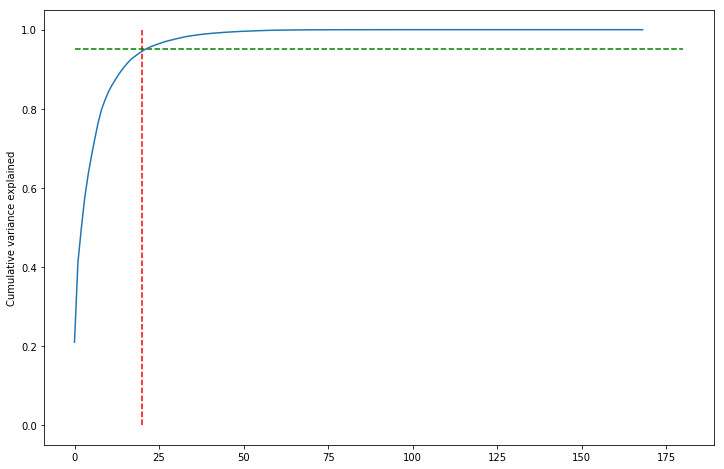

In [99]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=180, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### 20 variables explains 95% variance

Perform PCA with 20 Components

In [100]:
from sklearn.decomposition import IncrementalPCA

In [101]:
pca_final = IncrementalPCA(n_components=20)

In [102]:
X_train_pca1 = pca_final.fit_transform(X_train_scaled)

In [103]:
X_train_pca1.shape

(38578, 20)

In [104]:
#scaling of the X_test dataframe
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [105]:
X_test_pca1 = pca_final.transform(X_test_scaled)
X_test_pca1.shape

(8990, 20)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
learner_pca = LogisticRegression()

In [108]:
model_pca = learner_pca.fit(X_train_pca1, y_train)

In [109]:
y_test_pred = model_pca.predict(X_test_pca1)

In [110]:
from sklearn import metrics

In [111]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6804 1462]
 [ 145  579]]


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_test_pred))

0.821245828698554


In [113]:
accuracy_pca20 = metrics.accuracy_score(y_test, y_test_pred)
precision_pca20 = metrics.precision_score(y_test, y_test_pred)
recall_pca_20 = metrics.recall_score(y_test, y_test_pred)

In [114]:
#lets check the precision and the recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8266
           1       0.28      0.80      0.42       724

    accuracy                           0.82      8990
   macro avg       0.63      0.81      0.66      8990
weighted avg       0.92      0.82      0.86      8990



For us the recall metric is more importance as the aim of our model is to classify all churners almost correctly. Even if the non churners fall under the churn category, we are okay with it as the company will be able to retain the churners by promotional offers or discounts. The recall is almost 80% which is good.

In [115]:
#lets now plot the roc curve
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

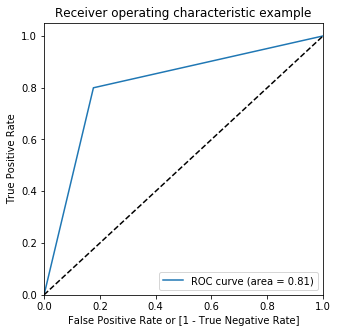

In [117]:
draw_roc(y_test, y_test_pred)

Area under the curve is 0.81 which is satisfactory

**Lets Try PCA with a explained variance ratio of 90%**

In [118]:
pca_again = PCA(0.9)

In [119]:
X_train_pca2 = pca_again.fit_transform(X_train_scaled)

In [120]:
X_train_pca2.shape

(38578, 55)

In [121]:
X_test_pca2 = pca_again.transform(X_test_scaled)

In [122]:
#Following it up with logistic regression model
learner_pca_2 = LogisticRegression()
model_pca2 = learner_pca_2.fit(X_train_pca2, y_train)
y_test_pred2 = model_pca2.predict(X_test_pca2)

In [123]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred2)
print(confusion)

[[6875 1391]
 [ 140  584]]


In [124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test, y_test_pred2))

0.8296996662958843


In [125]:
accuracy_pca90 = metrics.accuracy_score(y_test, y_test_pred2)
precision_pca90 = metrics.precision_score(y_test, y_test_pred2)
recall_pca_90 = metrics.recall_score(y_test, y_test_pred2)

In [126]:
#lets check the precision and the recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8266
           1       0.30      0.81      0.43       724

    accuracy                           0.83      8990
   macro avg       0.64      0.82      0.67      8990
weighted avg       0.92      0.83      0.86      8990



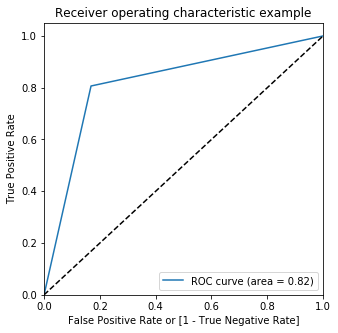

In [127]:
draw_roc(y_test, y_test_pred2)

Area under the curve is 0.82 and is satisfactory but the precision is very low.

The model with 90% variance is better than the one with 20 components.
But still in both the cases the we still have False Positives.

From the above model as well, the best model till now is the logistic regression model with variance ratio of 90%

**XGBoost**

In [128]:
#importing the required packages
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc #to delete unused variables

In [129]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [130]:
#making predictions on the test data
#using predict_proba since we need the probabilities to comput auc
y_pred_xgb = model.predict_proba(X_test)
y_pred_xgb[:10]

array([[0.9924233 , 0.00757671],
       [0.9960307 , 0.00396931],
       [0.99638355, 0.00361643],
       [0.99328583, 0.00671417],
       [0.97208947, 0.02791052],
       [0.994763  , 0.00523698],
       [0.9854153 , 0.01458474],
       [0.97922456, 0.02077544],
       [0.9931229 , 0.00687712],
       [0.98634464, 0.01365534]], dtype=float32)

In [131]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred_xgb[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 93.41%


In [132]:
#hyper parameter tuning with XGBoost
#creating a KFold object
folds = 3

#range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, objective = 'reg:logistic')

#GridSearchCV
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [133]:
#fitting the model
xgb_model1 = model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 10.4min finished


In [134]:
#cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.815257,0.319500,0.239894,0.025102,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.927405,0.915343,0.920604,0.921117,0.004938,3,0.966839,0.969134,0.969650,0.968541,0.001222
1,41.262482,0.340225,0.252411,0.007953,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.928758,0.920904,0.925460,0.925040,0.003220,2,0.971797,0.972346,0.973691,0.972611,0.000796
2,42.485197,1.306708,0.252696,0.009329,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.930725,0.924757,0.926626,0.927369,0.002492,1,0.972163,0.972573,0.972714,0.972483,0.000234
3,32.204776,1.452734,0.271202,0.016136,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.887062,0.873065,0.874874,0.878334,0.006216,6,0.969479,0.972097,0.972735,0.971437,0.001409
4,40.707609,1.338183,0.189118,0.066056,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.899139,0.902481,0.907286,0.902969,0.003344,5,0.988917,0.988552,0.989762,0.989077,0.000507
5,14.333140,0.099727,0.069785,0.004226,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.917279,0.913419,0.917765,0.916155,0.001944,4,0.993051,0.993456,0.993136,0.993214,0.000174


In [135]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.815257,0.319500,0.239894,0.025102,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.927405,0.915343,0.920604,0.921117,0.004938,3,0.966839,0.969134,0.969650,0.968541,0.001222
1,41.262482,0.340225,0.252411,0.007953,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.928758,0.920904,0.925460,0.925040,0.003220,2,0.971797,0.972346,0.973691,0.972611,0.000796
2,42.485197,1.306708,0.252696,0.009329,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.930725,0.924757,0.926626,0.927369,0.002492,1,0.972163,0.972573,0.972714,0.972483,0.000234
3,32.204776,1.452734,0.271202,0.016136,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.887062,0.873065,0.874874,0.878334,0.006216,6,0.969479,0.972097,0.972735,0.971437,0.001409
4,40.707609,1.338183,0.189118,0.066056,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.899139,0.902481,0.907286,0.902969,0.003344,5,0.988917,0.988552,0.989762,0.989077,0.000507


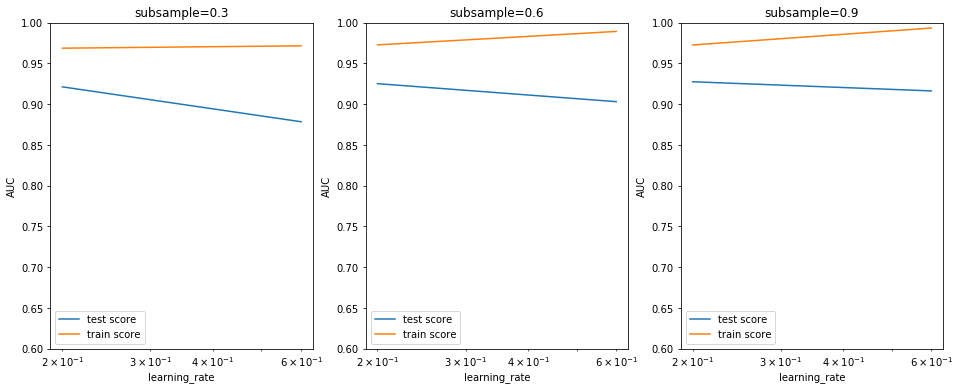

In [136]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='down left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained.

In [137]:
#Let's build a final model with the chosen hyperparameters.
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'reg:logistic'}
# fit model on training data
model = XGBClassifier(params = params)
model_xgb2 = model.fit(X_train, y_train)

In [138]:
# predict
y_pred_xgbfinal = model.predict_proba(X_test)
y_pred_xgbfinal[:10]

array([[0.9924233 , 0.00757671],
       [0.9960307 , 0.00396931],
       [0.99638355, 0.00361643],
       [0.99328583, 0.00671417],
       [0.97208947, 0.02791052],
       [0.994763  , 0.00523698],
       [0.9854153 , 0.01458474],
       [0.97922456, 0.02077544],
       [0.9931229 , 0.00687712],
       [0.98634464, 0.01365534]], dtype=float32)

In [139]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred_xgb[:, 1])
auc

0.9341250100990947

In [140]:
y_pred_xgb2 = model.predict(X_test)

In [141]:
#confusion matrix
#printing classification report, confusion matrix, accuracy score and roc curve
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred_xgb2)
print(confusion)

[[8174  119]
 [ 360  337]]


In [142]:
#accuracy score
print(metrics.accuracy_score(y_test, y_pred_xgb2))

0.946718576195773


In [143]:
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb2)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb2)
recall_pca_xgb = metrics.recall_score(y_test, y_pred_xgb2)

In [144]:
#classification report
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8293
           1       0.74      0.48      0.58       697

    accuracy                           0.95      8990
   macro avg       0.85      0.73      0.78      8990
weighted avg       0.94      0.95      0.94      8990



Though we did have an improvement in the precision rate, the recall rate has gone down which is an important metric for us. So lets consider our model as the one with logistic regression and variance = 90% if the company is looking to save only churners.

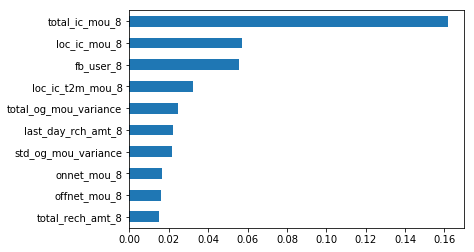

total_rech_amt_8         0.014789
offnet_mou_8             0.015888
onnet_mou_8              0.016469
std_og_mou_variance      0.021747
last_day_rch_amt_8       0.022179
total_og_mou_variance    0.024693
loc_ic_t2m_mou_8         0.032145
fb_user_8                0.055846
loc_ic_mou_8             0.057330
total_ic_mou_8           0.161957
dtype: float32

In [145]:
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()
weights.sort_values()[-10:]

**Random Forest**

In [146]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [147]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [148]:
predictions = rfc.predict(X_test)

In [149]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.79      0.44      0.56       697

    accuracy                           0.95      8990
   macro avg       0.87      0.71      0.77      8990
weighted avg       0.94      0.95      0.94      8990



In [150]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8211   82]
 [ 391  306]]


## Tuning max_depth

In [151]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [152]:
predictions = rf.predict(X_test)

In [153]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.78      0.44      0.56       697

    accuracy                           0.95      8990
   macro avg       0.87      0.72      0.77      8990
weighted avg       0.94      0.95      0.94      8990



In [154]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8207   86]
 [ 389  308]]


### Tuning n_estimators

In [155]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy')

In [156]:
predictions = rf.predict(X_test)

In [157]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.79      0.42      0.55       697

    accuracy                           0.95      8990
   macro avg       0.87      0.71      0.76      8990
weighted avg       0.94      0.95      0.94      8990



In [158]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8213   80]
 [ 402  295]]


### Tuning max_features

In [159]:
##### GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             scoring='accuracy')

In [160]:
predictions = rf.predict(X_test)

In [161]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8293
           1       0.77      0.46      0.58       697

    accuracy                           0.95      8990
   macro avg       0.87      0.72      0.77      8990
weighted avg       0.94      0.95      0.94      8990



In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8200   93]
 [ 378  319]]


### Tuning min_samples_leaf

In [163]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='accuracy')

In [164]:
predictions = rf.predict(X_test)

In [165]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.81      0.40      0.54       697

    accuracy                           0.95      8990
   macro avg       0.88      0.70      0.76      8990
weighted avg       0.94      0.95      0.94      8990



In [166]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8228   65]
 [ 416  281]]


### Tuning min_samples_split

In [167]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             scoring='accuracy')

In [168]:
predictions = rf.predict(X_test)

In [169]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.80      0.42      0.56       697

    accuracy                           0.95      8990
   macro avg       0.88      0.71      0.76      8990
weighted avg       0.94      0.95      0.94      8990



In [170]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8220   73]
 [ 401  296]]


### Final Model with all the Hyperparameters

In [171]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [172]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  3.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [173]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9416952707856598 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


In [174]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)

In [175]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=400)

In [176]:
# predict
predictions = rfc.predict(X_test)

In [177]:
accuracy_rf = metrics.accuracy_score(y_test, predictions)
precision_rf = metrics.precision_score(y_test, predictions)
recall_rf = metrics.recall_score(y_test, predictions)

In [178]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8293
           1       0.82      0.38      0.52       697

    accuracy                           0.95      8990
   macro avg       0.89      0.69      0.75      8990
weighted avg       0.94      0.95      0.94      8990



In [179]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8235   58]
 [ 430  267]]


The XG Boost Model has striked a better balance when compared to all other models with respect to precision or recall. But if most of the churners are to saved, then its better to go with LR models with explained variance ratio of 90% where the recall is at the highest.

In [180]:
metrics_df = pd.DataFrame({'Metric' : ['Accuracy', 'Precision', 'Recall'],
                           'LR with PCA 20 Components' : [accuracy_pca20, precision_pca20, recall_pca_20],
                           'LR with PCA 90% Variance' : [accuracy_pca90, precision_pca90, recall_pca_90],
                           'XGBoost' : [accuracy_xgb, precision_xgb, recall_pca_xgb],
                           'Random Forest' : [accuracy_rf, precision_rf, recall_rf]})

In [181]:
metrics_df.set_index(['Metric'])

,LR with PCA 20 Components,LR with PCA 90% Variance,XGBoost,Random Forest
Metric,,,,
Accuracy,0.821246,0.829700,0.946719,0.945717
Precision,0.283684,0.295696,0.739035,0.821538
Recall,0.799724,0.806630,0.483501,0.383070


From the above data if the company wants to concentrate only on reducing the churners, they can go ahead with the LR model with a variance 90%. Also if company is looking of balance of both precision and recall, then model produced by XGBoost will be the best.

## Most Important Features

1. total_rech_num_7        
2. total_rech_amt_8         
3. loc_og_t2m_mou_8      
4. offnet_mou_8             
5. total_og_mou_variance    
6. last_day_rch_amt_8       
7. loc_ic_t2m_mou_8         
8. fb_user_8                
9. loc_ic_mou_8             
10. total_ic_mou_8           
           


## Strategies to handle Churn

1. Providing good service schemes for users to access social networking sites such as Facebook and others

2. Provide good recharge schemes and disounts and offers to customers whose local incoming calls are declining from 7th to 8th month.

3. More outgoing calls to other telecom operators might indicate that the customer is not making calls within the same operator so provide offers and recharge schemes for calls within same operator.

4. A high OFFNET in the 8th month indicate that customer is not happy with Signal quality of the current operator , enhance signal strength.

5. Provide special offers and promotions on last day of recharge, this makes sure that the customer chooses the option to recharge thereby retaining the customer and also increase the revenue.

6. Customers who are always travelling are on roaming networks, providing attractive offers on roaming packs might be beneficial

7. Focus more on providing offers and discounts for local calls rather than STD calls

